<a href="https://colab.research.google.com/github/seugminhama/-Univ-data-anaylysis-project/blob/main/%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%A7%84%EB%8B%A8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터 소개

In [ ]:
#Pregnancies : 임신횟수
#Glucose : 포도당 농도
#BloodPressure : 혈압
#SkinThickness : 피부두께
#Insulin : 인슐린
#BMI : 체질량지수
#DiabetesPedigreeFunction : 당뇨병 혈통 기능
#Age : 나이
#Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

In [ ]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,110,74,29,125,32.4,0.698,27,0
1,1,89,66,23,94,28.1,0.167,21,0
2,8,84,74,31,0,38.3,0.457,39,0
3,6,108,44,20,130,24.0,0.813,35,0
4,0,95,85,25,36,37.4,0.247,24,1


In [ ]:
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,130,60,23,170,28.6,0.692,21,0
1,0,180,66,39,0,42.0,1.893,25,1
2,5,95,72,33,0,37.7,0.370,27,0
3,2,93,64,32,160,38.0,0.674,23,1
4,0,84,64,22,66,35.8,0.545,21,0


In [ ]:
#데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               521 non-null    int64  
 1   Glucose                   521 non-null    int64  
 2   BloodPressure             521 non-null    int64  
 3   SkinThickness             521 non-null    int64  
 4   Insulin                   521 non-null    int64  
 5   BMI                       521 non-null    float64
 6   DiabetesPedigreeFunction  521 non-null    float64
 7   Age                       521 non-null    int64  
 8   Outcome                   521 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 36.8 KB


In [ ]:
#데이터의 통계요약 확인
print("\n train데이터 기초통계량")
display(train.describe())
print("\n test데이터 기초통계량")
display(test.describe())


 train데이터 기초통계량


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,3.854127,120.959693,69.017274,19.948177,78.585413,31.785413,0.455434,33.247601,0.349328
std,3.242421,32.300457,18.396218,15.327426,111.405138,7.217480,0.314621,11.729898,0.477216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.235000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,32.000000,31.900000,0.351000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,32.000000,126.000000,35.900000,0.607000,41.000000,1.000000
max,15.000000,199.000000,110.000000,54.000000,846.000000,52.900000,2.137000,81.000000,1.000000



 test데이터 기초통계량


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,4.198473,120.893130,68.412214,22.396947,90.000000,32.591603,0.503710,34.557252,0.351145
std,3.646747,30.857053,22.112256,18.011398,140.287726,8.358681,0.381906,12.184581,0.479161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121000,21.000000,0.000000
25%,1.000000,100.000000,63.000000,0.000000,0.000000,26.750000,0.269000,25.000000,0.000000
50%,3.000000,118.000000,72.000000,24.000000,36.000000,32.900000,0.394000,30.000000,0.000000
75%,6.000000,137.500000,80.000000,35.000000,125.000000,37.600000,0.613500,42.000000,1.000000
max,13.000000,197.000000,114.000000,99.000000,744.000000,57.300000,2.329000,66.000000,1.000000


In [ ]:
#결측지 확인
print("\n train데이터 결측치")
print(train.isnull().sum())
print("\n test데이터 결측치")
print(test.isnull().sum())


 train데이터 결측치
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 test데이터 결측치
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


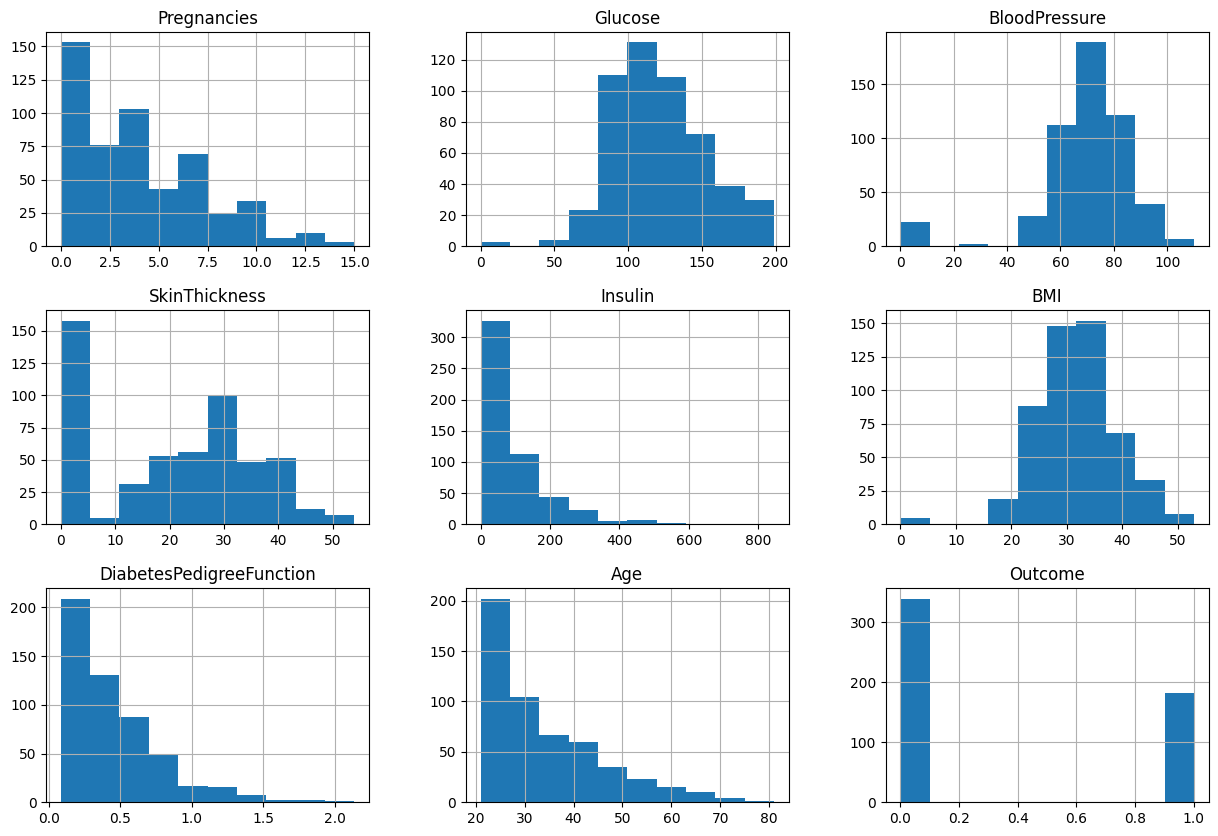

In [ ]:
#데이터의 분포 확인
train.hist(figsize=(15,10))
plt.show()

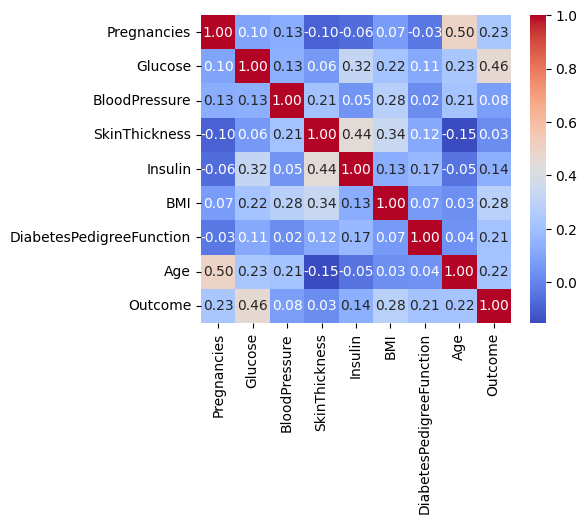

In [ ]:
#train데이터의 상관관계 시각화
plt.figure(figsize=(5,4))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

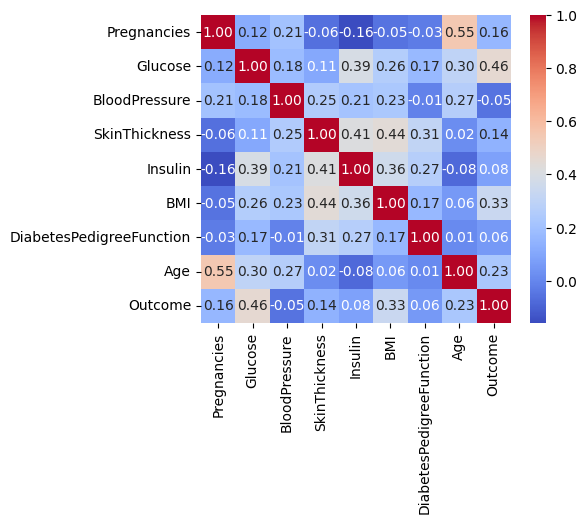

In [ ]:
#test데이터 상관관계 시각화
plt.figure(figsize=(5,4))
sns.heatmap(test.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

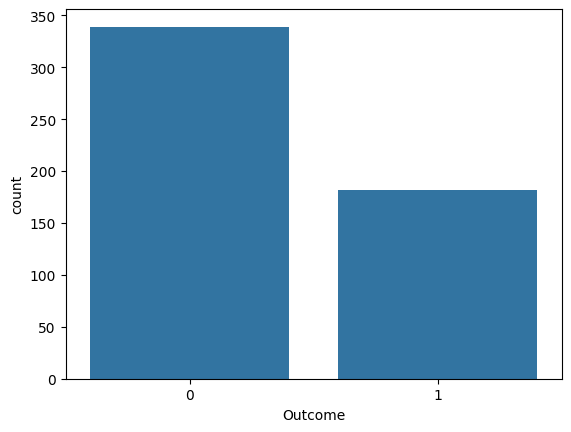

In [ ]:
# Outcome 비율 시각화(당뇨병 여부 분포)
sns.countplot(x='Outcome', data=train)
plt.show()

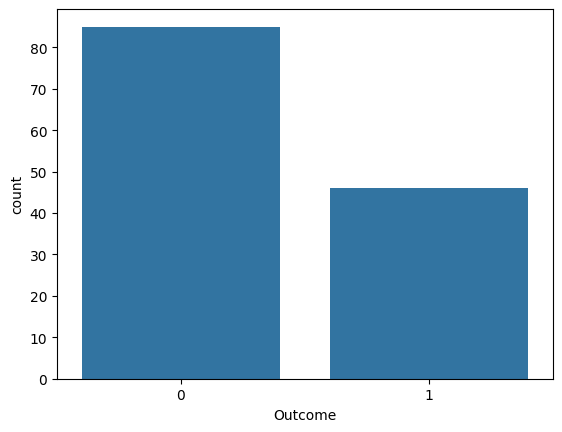

In [ ]:
sns.countplot(x='Outcome', data=test)
plt.show()

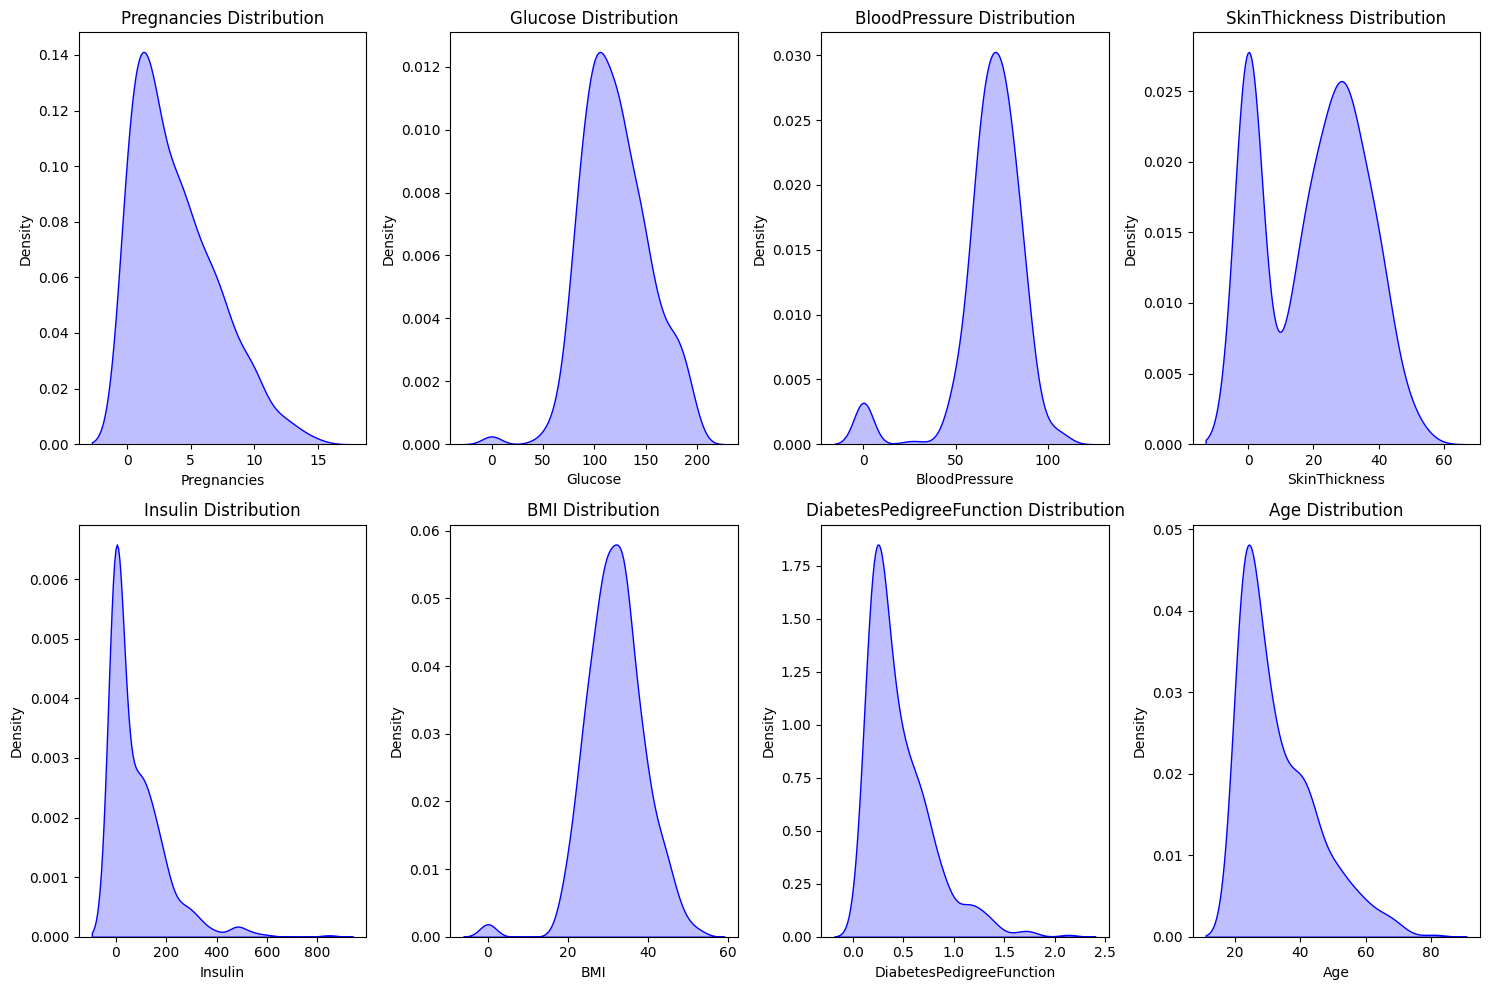

In [ ]:
#각 특성의 분포를 KDE 플롯으로 시각화
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(15,10))
for i, feature in enumerate(features):
    plt.subplot(2,4,i+1)
    sns.kdeplot(train[feature], color='blue', shade=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

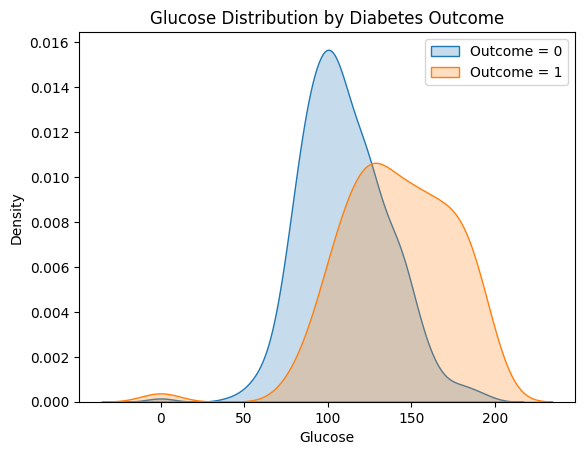

In [ ]:
#당뇨병 환자와 비당뇨병 환자 사이의 포도당 농도 차이
sns.kdeplot(data=train[train['Outcome'] == 0]['Glucose'], shade=True, label='Outcome = 0')
sns.kdeplot(data=train[train['Outcome'] == 1]['Glucose'], shade=True, label='Outcome = 1')
plt.title('Glucose Distribution by Diabetes Outcome')
plt.legend()
plt.show()

# 전처리

In [ ]:
#결측지 대치(평균으로 대체)
imputer = SimpleImputer(strategy='mean')
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']

X_test = test.drop(columns=['Outcome'])
y_test = test['Outcome']

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [ ]:
#이상치 탐지 및 처리
#IQR 방식으로 이상치 탐지
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

#하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#이상치 탐지
outliers = ((X_train < lower_bound) | (X_train > upper_bound))
outlier_counts = outliers.sum()
print("\n 이상치 개수 확인 (IQR 기준)")
print(outlier_counts)


 이상치 개수 확인 (IQR 기준)
Pregnancies                  3
Glucose                      3
BloodPressure               28
SkinThickness                0
Insulin                     22
BMI                         10
DiabetesPedigreeFunction    22
Age                          8
dtype: int64


In [ ]:
#이상치를 NaN으로 변환
for col in X_train.columns:
  X_train[col] = np.where((X_train[col] < lower_bound[col]) | (X_train[col] > upper_bound[col]), np.nan, X_train[col])

#결측지 대치(평균으로 대체)
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [ ]:
#다중공선성 확인
#VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

#VIF 결과 확인
print(vif_data)

                    Feature        VIF
0               Pregnancies   3.440723
1                   Glucose  18.616706
2             BloodPressure  37.283516
3             SkinThickness   3.984684
4                   Insulin   2.351144
5                       BMI  32.280794
6  DiabetesPedigreeFunction   4.111130
7                       Age  16.359047


Text(0.5, 1.0, 'Random Forest Feature Importance')

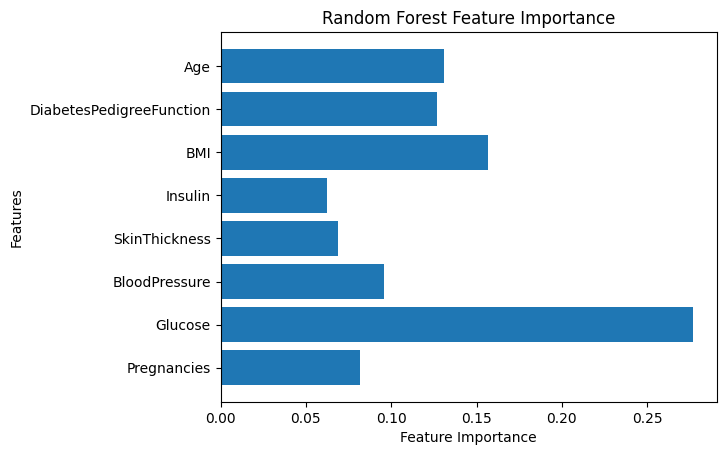

In [ ]:
#피처중요도 확인(랜덤포레스트 기반)
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

#피처중요도 출력
feature_importances = forest.feature_importances_
features = X_train.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')

In [ ]:
#독립변수와 종속변수 정의
X = train.drop(columns=['Outcome'])
y = train['Outcome']

#표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#표준화된 데이터를 데이터프레임으로 변환
train_scaled = pd.DataFrame(X_scaled, columns=X.columns)
test_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#종속변수 추가
train_scaled['Outcome'] = y

print("\n 정규화(표준화) 완료")


 정규화(표준화) 완료


In [ ]:
print(train_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.572384 -0.339631       0.271116       0.591131  0.417029  0.085234   
1    -0.881091 -0.990401      -0.164174       0.199300  0.138498 -0.511114   
2     1.279864 -1.145346       0.271116       0.721742 -0.706080  0.903480   
3     0.662448 -0.401609      -1.361221       0.003384  0.461954 -1.079725   
4    -1.189799 -0.804467       0.869640       0.329910 -0.382625  0.778663   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.771720 -0.533134        0  
1                 -0.917647 -1.045139        0  
2                  0.004983  0.490876        0  
3                  1.137591  0.149540        0  
4                 -0.663129 -0.789136        1  


In [ ]:
#다중공선성 문제로 BloodPressure와 BMI를 결합하여 새로운 변수 생성
#BloodPressure와 BMI 결합
train_scaled['Combined_BP_BMI'] = train_scaled['BloodPressure'] * train_scaled['BMI']
test_scaled['Combined_BP_BMI'] = test_scaled['BloodPressure'] * test_scaled['BMI']

#기존 BloodPressure와 BMI 제거 후 VIF 계산
X = train_scaled.drop(columns=['BloodPressure', 'BMI'])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Feature       VIF
0               Pregnancies  1.364280
1                   Glucose  1.364730
2             SkinThickness  1.285093
3                   Insulin  1.422631
4  DiabetesPedigreeFunction  1.066784
5                       Age  1.433025
6                   Outcome  1.248382
7           Combined_BP_BMI  1.041585


In [ ]:
#데이터의 불규형 문제 해결
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 모델링

In [ ]:
#로지스틱 회귀모델 학습
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [ ]:
#결정트리
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
#랜덤포레스트
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [ ]:
#AdaBoost
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

In [ ]:
#GBM
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
#XGBoost
xgboost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

In [ ]:
#SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
#모델별 성능 저장
models = {
    'Logistic Regression' : y_pred_log,
    'Decision Tree' : y_pred_tree,
    'Random Forest' : y_pred_forest,
    'AdaBoost' : y_pred_ada,
    'GBM' : y_pred_gbm,
    'XGBoost' : y_pred_xgb,
    'SVM' : y_pred_svm
}


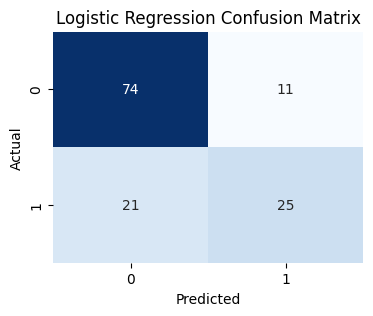

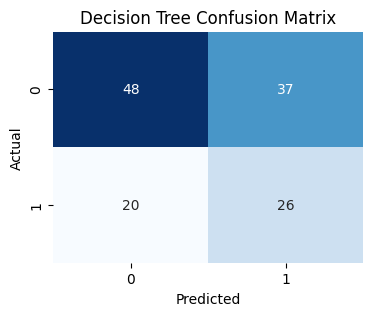

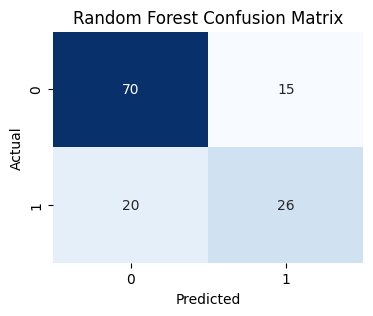

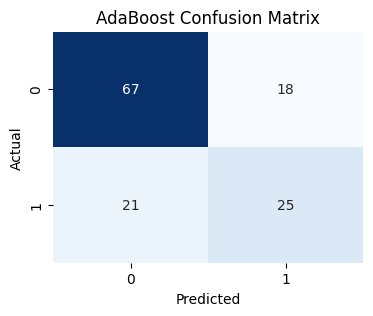

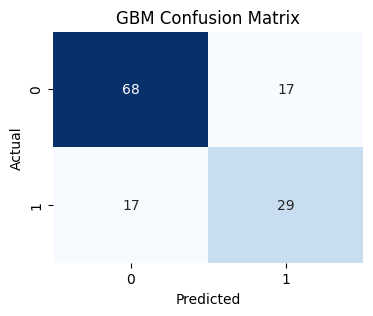

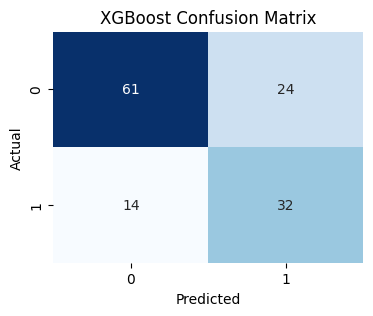

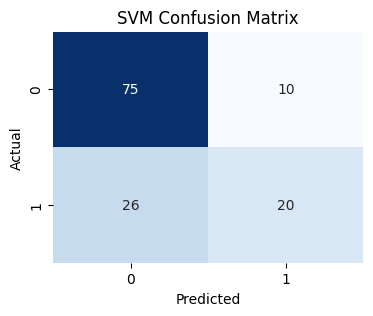

In [ ]:
#각 모델의 Confusion Matrix 시각화
for model_name, y_pred in models.items():
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(4, 3))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(f'{model_name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [ ]:
results = []

for model_name, y_pred in models.items():
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  results.append({
      'Model' : model_name,
      'Accuracy' : accuracy,
      'Precision' : precision,
      'Recall' : recall,
      'F1 Score' : f1
  })
  print(f"\n {model_name} 성능 평가")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")


 Logistic Regression 성능 평가
Accuracy: 0.7557
Precision: 0.6944
Recall: 0.5435
F1 Score: 0.6098

 Decision Tree 성능 평가
Accuracy: 0.5649
Precision: 0.4127
Recall: 0.5652
F1 Score: 0.4771

 Random Forest 성능 평가
Accuracy: 0.7328
Precision: 0.6341
Recall: 0.5652
F1 Score: 0.5977

 AdaBoost 성능 평가
Accuracy: 0.7023
Precision: 0.5814
Recall: 0.5435
F1 Score: 0.5618

 GBM 성능 평가
Accuracy: 0.7405
Precision: 0.6304
Recall: 0.6304
F1 Score: 0.6304

 XGBoost 성능 평가
Accuracy: 0.7099
Precision: 0.5714
Recall: 0.6957
F1 Score: 0.6275

 SVM 성능 평가
Accuracy: 0.7252
Precision: 0.6667
Recall: 0.4348
F1 Score: 0.5263


In [ ]:
#성능비교 표 출력
results_df = pd.DataFrame(results)
print("\n 모델별 성능 비교 표")
print(results_df)


 모델별 성능 비교 표
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.755725   0.694444  0.543478  0.609756
1        Decision Tree  0.564885   0.412698  0.565217  0.477064
2        Random Forest  0.732824   0.634146  0.565217  0.597701
3             AdaBoost  0.702290   0.581395  0.543478  0.561798
4                  GBM  0.740458   0.630435  0.630435  0.630435
5              XGBoost  0.709924   0.571429  0.695652  0.627451
6                  SVM  0.725191   0.666667  0.434783  0.526316


In [ ]:
#회귀계수와 오즈비 계산
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

In [ ]:
#피처 이름과 오즈비를 데이터프레임으로 정리
feature_names = X_train.columns
odds_ratio_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})

In [ ]:
#오즈비를 내림차순으로 정렬
odds_ratio_df = odds_ratio_df.sort_values(by='Odds Ratio', ascending=False)

print("\n 로지스틱 회귀 오즈비 표")
print(odds_ratio_df)


 로지스틱 회귀 오즈비 표
                    Feature  Coefficient  Odds Ratio
6  DiabetesPedigreeFunction     1.253828    3.503730
0               Pregnancies     0.108691    1.114818
5                       BMI     0.084990    1.088706
1                   Glucose     0.038598    1.039352
7                       Age     0.010490    1.010546
2             BloodPressure     0.006480    1.006501
4                   Insulin    -0.002467    0.997536
3             SkinThickness    -0.005725    0.994291


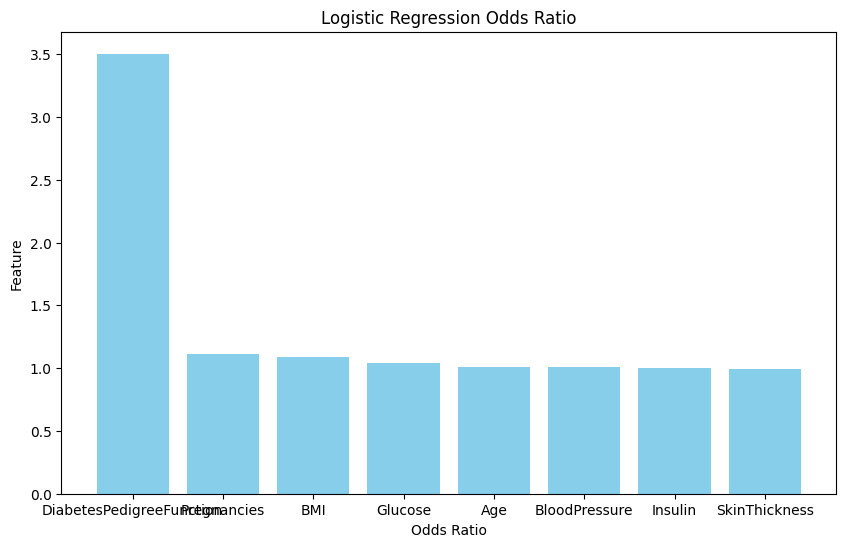

In [ ]:
#오즈비 시각화
plt.figure(figsize=(10, 6))
plt.bar(odds_ratio_df['Feature'], odds_ratio_df['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Logistic Regression Odds Ratio')
plt.show()